![](2layerNN.PNG)

In [1]:
import numpy as np

X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

Y = np.array([
    [0],
    [0],
    [0],
    [1]
])

m = X.shape[0]
num_nodes = 7

W1 = np.random.randn(num_nodes,X.shape[1])
b1 = np.zeros((num_nodes,1))

W2 = np.random.randn(1,num_nodes)
b2 = np.zeros((1,X.shape[0]))

X = X.T
Y = Y.T

In [2]:
print(X.shape)

(2, 4)


In [3]:
print(W1.shape)

(7, 2)


## Layer 1 (Node A and B)

In [4]:
Z1 = np.dot(W1,X) + b1 # (num_nodes,len(Y)) = (2,4)
A1 = 1/(1+np.exp(-Z1)) # (num_nodes,len(Y)) 

In [5]:
A1.shape

(7, 4)

## Output Layer (Node C)

In [6]:
Z2 = np.dot(W2,A1) + b2 # (1,len(Y)) = (1,4)
A2 = 1/(1+np.exp(-Z2)) # (1,len(Y)) 

In [7]:
A2.shape

(1, 4)

## BackProp Output Layer (Node C)

In [8]:
dZ2 = A2 - Y
dW2 = (1/m)*np.dot(dZ2,A1.T) 
db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)

In [9]:
print("dZ2.shape = ",dZ2.shape)
print("dW2.shape = ",dW2.shape)
print("db2.shape = ",db2.shape)

dZ2.shape =  (1, 4)
dW2.shape =  (1, 7)
db2.shape =  (1, 1)


## GD for Output Layer (Node C)

In [10]:
W2 = W2 - 0.01*dW2
b2 = b2 - 0.01*db2

In [11]:
print("W2.shape = ",W2.shape)
print("b2.shape = ",b2.shape)

W2.shape =  (1, 7)
b2.shape =  (1, 4)


In [12]:
np.dot(W2.T, dZ2).shape

(7, 4)

In [13]:
np.power(A1, 2).shape

(7, 4)

## BackProp  Layer1 (Node A and B)

In [14]:
dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
dW1 = (1/m)*np.dot(dZ1,X.T)
db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)

In [17]:
dZ1.shape

(7, 4)

In [16]:
dW2.shape

(1, 7)

# FULL IMPLETEMENTATION

In [7]:
import numpy as np

X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

Y = np.array([
    [0],
    [0],
    [0],
    [1]
])

m = X.shape[0]
num_nodes = 400

W1 = np.random.randn(num_nodes,X.shape[1])*0.1
b1 = np.zeros((num_nodes,1))

W2 = np.random.randn(1,num_nodes)*0.1
b2 = np.zeros((1,X.shape[0]))

X = X.T
Y = Y.T

costs = []

for i in range(4000):
    # Foward Prop
    # LAYER 1
    Z1 = np.dot(W1,X) + b1
    A1 = 1/(1+np.exp(-Z1))
    # LAYER 2
    Z2 = np.dot(W2,A1) + b2
    A2 = 1/(1+np.exp(-Z2))
    
    # Back Prop
    dZ2 = A2 - Y
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    
    # Gradient Descent
    W2 = W2 - 0.01*dW2
    b2 = b2 - 0.01*db2
    
    W1 = W1 - 0.01*dW1
    b1 = b1 - 0.01*db1
    
    # Loss
    L = (-1/m)*np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2))
    L = np.squeeze(L)
    costs.append(L)
    if i%500 == 0:
        print("=======================================")
        print("Loss = ",L)
        print(Y,"===",A2)

Loss =  0.5696414918789865
[[0 0 0 1]] === [[0.2366801  0.23332505 0.23081853 0.22755412]]
Loss =  0.4363985726084202
[[0 0 0 1]] === [[0.15457022 0.24334474 0.24403316 0.36092727]]
Loss =  0.3293248042932258
[[0 0 0 1]] === [[0.0790962  0.22064951 0.2230665  0.48036714]]
Loss =  0.24512751193702334
[[0 0 0 1]] === [[0.0342204  0.18784224 0.19064443 0.59089744]]
Loss =  0.18363971121190542
[[0 0 0 1]] === [[0.01369119 0.15348067 0.15591266 0.6806878 ]]
Loss =  0.14012242587425194
[[0 0 0 1]] === [[0.00550446 0.12362856 0.12549006 0.74907726]]
Loss =  0.10942788810850304
[[0 0 0 1]] === [[0.00232774 0.09995201 0.10130845 0.79990805]]
Loss =  0.08754072106462854
[[0 0 0 1]] === [[0.00105363 0.08183491 0.08281317 0.83753976]]


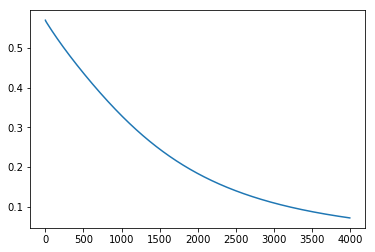

In [8]:
import matplotlib.pyplot as plt

plt.plot(costs)
plt.show()